In [1]:
from models.mlp_models import EnsembleModelRegression
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from dataloaders.dataloaders4mlp import CustomDataset
from utils import classifier_trainer, read_yaml

In [4]:


def cnn_data4mlp_regression(config, kfold=False):
    csv_file_path = os.path.join(config["data_dir"], "cnn_data1.csv")
    df = pd.read_csv(csv_file_path)
    df['Total_Activations_Batch_Size'] = df['Total Activations'] * df['Batch Size']
    df.loc[df['Status'] == 'OOM_CRASH', 'Max GPU Memory (MiB)'] = 42000
    df = df.dropna(subset=['Activation Function'])
    df = df[~df['architecture'].isin(['residual', 'dense'])]

    desired_labels = df['Max GPU Memory (MiB)'].values / 1000

    desired_features = df[['Depth','Total Activations', 'Total_Activations_Batch_Size', 'Total Parameters', 'Batch Size',
            'Conv2d Count', 'BatchNorm2d Count', 'Dropout Count', 
            # 'activation_encoding_sin', 'activation_encoding_cos',
            # 'Input Size (MB)', 'Forward/Backward Pass Size (MB)','Params Size (MB)', 'Estimated Total Size (MB)',
            ]].values
    if not kfold:
        x_train, x_temp, y_train, y_temp = train_test_split(desired_features, desired_labels, test_size=0.3, random_state=42)

        x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.66, random_state=42)
        train_dataloader = DataLoader(CustomDataset(x_train, y_train), config["batch_size"], num_workers=2, shuffle=True)
        val_dataloader = DataLoader(CustomDataset(x_val, y_val), config["batch_size"], num_workers=2)
        test_dataloader = DataLoader(CustomDataset(x_test, y_test),1, num_workers=1)
        return train_dataloader, val_dataloader, test_dataloader
    else:
        whole_dataset = CustomDataset(desired_features, desired_labels)
        return whole_dataset


In [6]:
config = read_yaml("config.yaml")
train_dataloader, val_dataloader, test_dataloader = cnn_data4mlp_regression(config, kfold=False)
x,_ = next(iter(train_dataloader))
features_dim = x.shape[-1]
regression_model = EnsembleModelRegression(model_list=[1,2,3,4,5,6,7,1,2,3,4,5,6], input_size=features_dim, 
                                           output_size=1, max_neurons=8, min_neurons=4, 
                                           learning_rate=config["learning_rate"])
regression_model = classifier_trainer(regression_model, train_dataloader, val_dataloader, config, filename=None)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name   | Type       | Params | Mode 
----------------------------------------------
0 | models | ModuleList | 2.4 K  | train
----------------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.010     Total estimated model params size (MB)
187       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/navid/Documents/Reza_missing_data_analysis/envs/missing_data_env/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/navid/Documents/Reza_missing_data_analysis/envs/missing_data_env/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (36) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

/home/navid/Documents/Reza_missing_data_analysis/envs/missing_data_env/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([81])) that is different to the input size (torch.Size([81, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Validation: |          | 0/? [00:00<?, ?it/s]

/home/navid/Documents/Reza_missing_data_analysis/envs/missing_data_env/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([11])) that is different to the input size (torch.Size([11, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Metric val_loss improved. New best score: 974.563


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 15.937 >= min_delta = 0.0. New best score: 958.626


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 10.661 >= min_delta = 0.0. New best score: 947.965


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 11.533 >= min_delta = 0.0. New best score: 936.432


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 12.463 >= min_delta = 0.0. New best score: 923.969


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 10.837 >= min_delta = 0.0. New best score: 913.132


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 13.678 >= min_delta = 0.0. New best score: 899.454


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 12.778 >= min_delta = 0.0. New best score: 886.676


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 11.556 >= min_delta = 0.0. New best score: 875.120


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 14.991 >= min_delta = 0.0. New best score: 860.129


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 15.681 >= min_delta = 0.0. New best score: 844.448


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 17.068 >= min_delta = 0.0. New best score: 827.380


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 15.523 >= min_delta = 0.0. New best score: 811.858


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 17.723 >= min_delta = 0.0. New best score: 794.135


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 16.699 >= min_delta = 0.0. New best score: 777.436


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 16.900 >= min_delta = 0.0. New best score: 760.536


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 23.264 >= min_delta = 0.0. New best score: 737.272


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 19.934 >= min_delta = 0.0. New best score: 717.338


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 11.422 >= min_delta = 0.0. New best score: 705.915


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 25.470 >= min_delta = 0.0. New best score: 680.446


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 10.245 >= min_delta = 0.0. New best score: 670.201


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 23.279 >= min_delta = 0.0. New best score: 646.922


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 23.616 >= min_delta = 0.0. New best score: 623.307


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 14.031 >= min_delta = 0.0. New best score: 609.276


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 20.259 >= min_delta = 0.0. New best score: 589.017


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 17.590 >= min_delta = 0.0. New best score: 571.426


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 27.518 >= min_delta = 0.0. New best score: 543.909


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 7.785 >= min_delta = 0.0. New best score: 536.124


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 25.961 >= min_delta = 0.0. New best score: 510.163


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 29.267 >= min_delta = 0.0. New best score: 480.896


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 19.148 >= min_delta = 0.0. New best score: 461.747


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 11.791 >= min_delta = 0.0. New best score: 449.957


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 15.573 >= min_delta = 0.0. New best score: 434.383


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 11.927 >= min_delta = 0.0. New best score: 422.456


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 20.840 >= min_delta = 0.0. New best score: 401.616


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 15.199 >= min_delta = 0.0. New best score: 386.417


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 13.325 >= min_delta = 0.0. New best score: 373.092


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 11.386 >= min_delta = 0.0. New best score: 361.706


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 17.956 >= min_delta = 0.0. New best score: 343.750


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 2.680 >= min_delta = 0.0. New best score: 341.069


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 16.216 >= min_delta = 0.0. New best score: 324.854


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 8.471 >= min_delta = 0.0. New best score: 316.382


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 11.471 >= min_delta = 0.0. New best score: 304.911


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 3.610 >= min_delta = 0.0. New best score: 301.302


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 7.312 >= min_delta = 0.0. New best score: 293.990


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 7.309 >= min_delta = 0.0. New best score: 286.681


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 8.126 >= min_delta = 0.0. New best score: 278.555


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 2.628 >= min_delta = 0.0. New best score: 275.927


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.817 >= min_delta = 0.0. New best score: 275.110


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 8.363 >= min_delta = 0.0. New best score: 266.747


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 2.650 >= min_delta = 0.0. New best score: 264.097


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 3.406 >= min_delta = 0.0. New best score: 260.691


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 2.651 >= min_delta = 0.0. New best score: 258.040


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 3.195 >= min_delta = 0.0. New best score: 254.845


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.568 >= min_delta = 0.0. New best score: 254.277


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 2.368 >= min_delta = 0.0. New best score: 251.909


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.045 >= min_delta = 0.0. New best score: 250.864


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.061 >= min_delta = 0.0. New best score: 250.803


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.755 >= min_delta = 0.0. New best score: 249.048


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.932 >= min_delta = 0.0. New best score: 248.116


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.245 >= min_delta = 0.0. New best score: 247.870


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.387 >= min_delta = 0.0. New best score: 247.484


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.115 >= min_delta = 0.0. New best score: 247.369


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.298 >= min_delta = 0.0. New best score: 247.071


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.150 >= min_delta = 0.0. New best score: 246.921


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.173 >= min_delta = 0.0. New best score: 246.748


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.065 >= min_delta = 0.0. New best score: 246.683


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.017 >= min_delta = 0.0. New best score: 246.666


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.034 >= min_delta = 0.0. New best score: 246.632


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.042 >= min_delta = 0.0. New best score: 246.591


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 30 records. Best score: 246.591. Signaling Trainer to stop.


In [8]:
import torch
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def calculate_regression_metrics(gt, pred_list):
    """
    Calculates common regression metrics between ground truth and predictions.
    
    Parameters:
    - gt: Ground truth values (array-like)
    - pred_list: Predicted values (array-like)
    
    Returns:
    - dict with MAE, MSE, RMSE, and R² score
    """
    gt = np.array(gt)
    pred_list = np.array(pred_list)

    mae = mean_absolute_error(gt, pred_list)
    mse = mean_squared_error(gt, pred_list)
    rmse = np.sqrt(mse)
    r2 = r2_score(gt, pred_list)

    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

def regression_model_eval(regression_model, test_dataloader):
    regression_model.eval()
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    regression_model.to(device)
    pred_list, gt = list(), list()
    with torch.no_grad():
        for test_data in test_dataloader:
            pred = regression_model(test_data[0].to(device))
            gt.append(test_data[1].item())
            pred_list.append(torch.argmax(pred, 1).item())

    regression_metrics = calculate_regression_metrics(gt, pred_list)
    return regression_metrics, gt, pred_list

In [9]:
regression_metrics, gt, pred_list = regression_model_eval(regression_model, test_dataloader)

 Regression metrics: 
MAE : 26.64509336793997
MSE : 960.727400598057
RMSE : 30.995602923609294
R2 : -2.8311647834509692


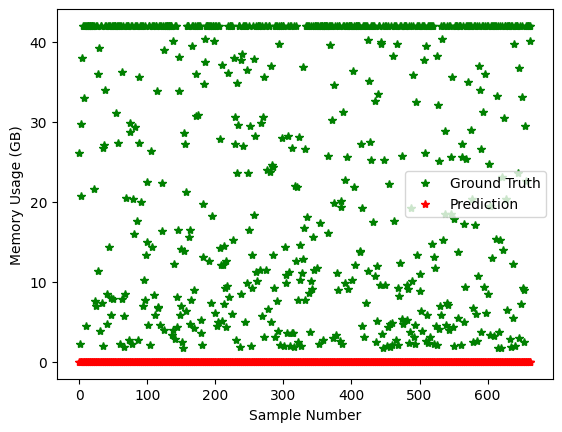

In [20]:
import matplotlib.pyplot as plt

print(" Regression metrics: ")
for metric, value in regression_metrics.items():
    print(f"{metric} : {value}")
plt.plot(gt, '*g', label='Ground Truth')
plt.plot(pred_list, '*r', label='Prediction')
plt.xlabel("Sample Number")
plt.ylabel("Memory Usage (GB)")
plt.legend()
plt.show()